In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(1, '../')

import experiment
import pickle
from utils import *
from Architectures import *
import random, os
suppress_warnings()
EPOCHS = 256


def countp(model, params):
    tmp = model(**params)
    tmp.build(input_shape=(1,15,7))
    return tmp.count_params()


n_params = []

os.environ['PYTHONHASHSEED']=str(0)
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

def human_format(num):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    # add more suffixes if you need them
    return '%.0f%s' % (num, ['', 'K', 'M', 'G', 'T', 'P'][magnitude])


filename = '../data/data100k_raw_combined_atlas_cut.pkl'
n_experiments = 8
SUFFIX = 'latent1'


#TESTING ######
# EPOCHS = 2
# filename = '../data/data50k_raw_combined_atlas_cut_small.pkl'
# n_experiments = 2
# SUFFIX = 'latent28'
###########

ERROR in cling::CIFactory::createCI(): cannot extract standard library include paths!
Invoking:
  LC_ALL=C x86_64-conda-linux-gnu-c++  -O3 -DNDEBUG -xc++ -E -v /dev/null 2>&1 | sed -n -e '/^.include/,${' -e '/^ \/.*++/p' -e '}'
Results was:
With exit code 0


Welcome to JupyROOT 6.22/08


2022-08-18 15:40:47.591133: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-18 15:40:47.591172: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
import seaborn as sns
import os

#to get latex to work 
os.environ['PATH'] = "%s:/usr/local/cuda-11.2/bin:/usr/local/bin:/usr/bin:/usr/local/sbin:/usr/sbin:/opt/anaconda/bin:/home/delon/texlive/bin/x86_64-linux:/home/delon/.local/bin:/home/delon/bin"%os.environ['PATH']


PI = experiment.Experimenter(filename)
PI.fromSaved(suffix=SUFFIX)

Initializing Experimenter
	Loading Data from ../data/data100k_raw_combined_atlas_cut.pkl
	Data Loaded
	Creating Splits
	Splits Created
Done initalizing
Loading Experimenter from Saved Experimenter at /data/delon/experimenter/data100k_raw_combined_atlas_cutlatent1
Experimenter Loaded
Getting split
Split Stored
Loading models
{'latent_one_5_(64, 128, 256, 128, 1)_64': 'models/data100k_raw_combined_atlas_cut_latent_one_5_(64, 128, 256, 128, 1)_64latent1'}
Loaded latent_one_5_(64, 128, 256, 128, 1)_64 from models/data100k_raw_combined_atlas_cut_latent_one_5_(64, 128, 256, 128, 1)_64latent1


2022-08-19 15:03:34.228215: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-19 15:03:34.228816: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-19 15:03:34.229102: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (top1.hep.utexas.edu): /proc/driver/nvidia/version does not exist
2022-08-19 15:03:34.230126: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
latent1 = PI.models['latent_one_5_(64, 128, 256, 128, 1)_64']
PI.get_ROC('latent_one', model_params_dict['latent_one'])

getting ROC for latent_one
currently on latent_one_5_(64, 128, 256, 128, 1)_64


(array([0.        , 0.        , 0.        , ..., 0.97418751, 0.97418751,
        1.        ]),
 array([0.00000000e+00, 3.32314236e-05, 3.65545660e-03, ...,
        9.99966769e-01, 1.00000000e+00, 1.00000000e+00]),
 array([1.9997985e+00, 9.9979848e-01, 9.9882072e-01, ..., 4.4896253e-05,
        4.4857741e-05, 2.5992981e-09], dtype=float32),
 0.9565266606018392)

2022-08-19 15:03:38.540539: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-08-19 15:03:38.541699: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2397305000 Hz


In [5]:
X_test_latent, y_test_latent = PI.get_test_dataset('latent_one')


In [10]:
n_cut = int(len(X_test_latent)*0.1)
n_cut = 15000

indices = np.random.permutation(len(X_test_latent))
cut = np.s_[indices[:n_cut]]

latent_label = y_test_latent.numpy()[cut]

In [11]:
latent_getter = LatentGetter(latent1.layers[0:3], condensed=True)
latent_reps = latent_getter.predict(X_test_latent.numpy()[cut])

In [13]:
import matplotlib.pyplot as plt

In [15]:
ttH_loc = np.array([latent_reps[i][0] for i in range(len(latent_label)) if latent_label[i][1]==1])
nttH_loc = np.array([latent_reps[i][0] for i in range(len(latent_label)) if latent_label[i][0]==1])

In [17]:
import seaborn as sns

<AxesSubplot:ylabel='Density'>

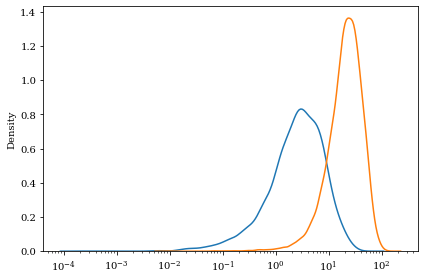

In [31]:
col_aux='#d495f4'
linew=1
c_cut = 5

bgrey = sns.dark_palette(col_aux, reverse=True, as_cmap=True)
COL2 = bgrey(.8)
sns.kdeplot(x=nttH_loc, shade=False, label=r'ttbar jets',  cut=c_cut, 
            levels=10, log_scale=True)
sns.kdeplot(x=ttH_loc, shade=False, label=r'ttH jets',  cut=c_cut, 
            levels=10, log_scale=True)